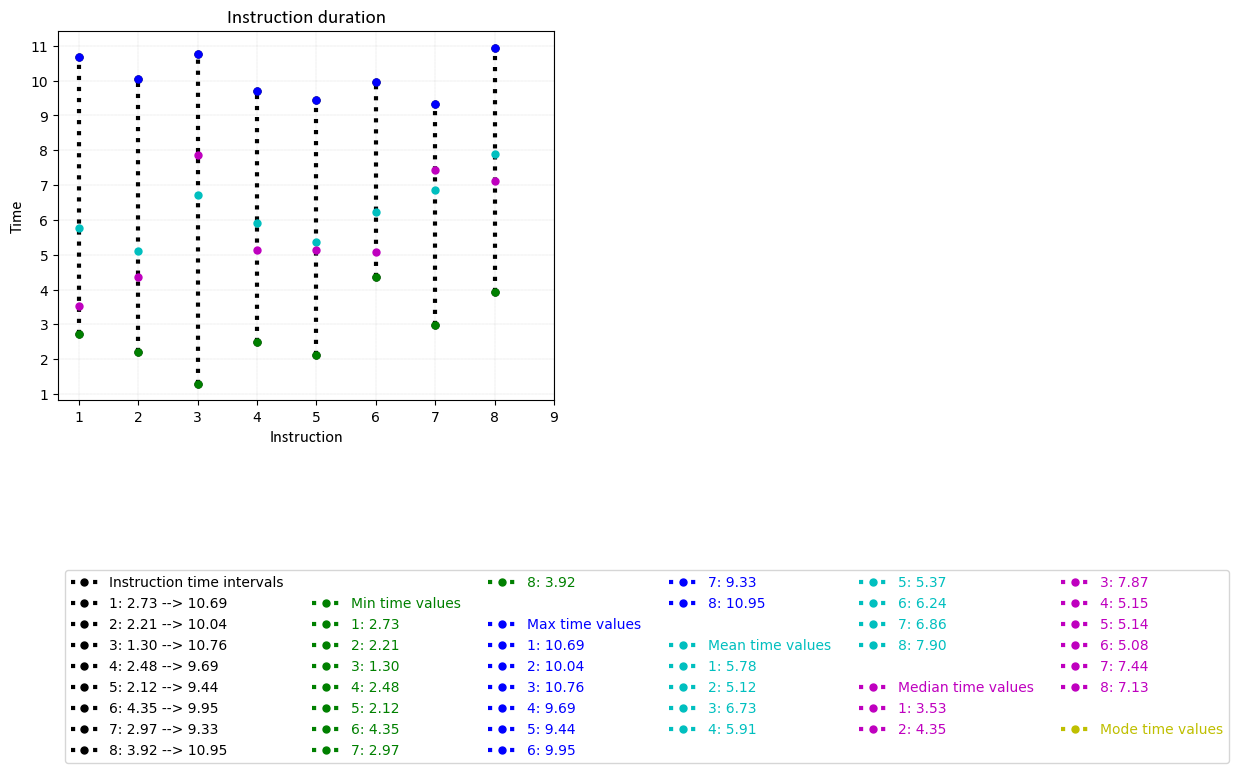

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import statistics as st
import math as mt
import random as rd
import matplotlib.patches as mpatches
import warnings

# ignore future warning
warnings.simplefilter ( action = "ignore" , category = FutureWarning )

# function used to check if the input data are correct
def check_input_data ( x_axis_values , y_axis_values ) :

	# if there is no value in one of input array
	if len ( x_axis_values ) == 0 or len ( y_axis_values ) == 0 :
		return False

	# if the input array don't have same length
	if len ( x_axis_values ) != len ( y_axis_values ) :
		return False

	# if for some instructions there is an empty array on y_axis_values
	for actual_instruction_measures in y_axis_values :
		if len ( actual_instruction_measures ) == 0 :
			return False

	# if some instructions have different number of measures
	number_measures = len ( y_axis_values [ 0 ] )
	for actual_instruction_measures in y_axis_values :
		if len ( actual_instruction_measures ) != number_measures :
			return False

	# correct input array
	return True

# function used to get min and max for the two axis respect input data
def get_min_max_values_two_axis ( x_axis_values , y_axis_values ) :

	# find min and max of input instruction number
	min_x_axis = np.min ( x_axis_values )
	max_x_axis = np.max ( x_axis_values )

	# find min and max of all measures
	min_y_axis = y_axis_values [ 0 ] [ 0 ]
	max_y_axis = y_axis_values [ 0 ] [ 0 ]

	# for each set of measures
	for actual_instruction_measures in y_axis_values :

		# for each measure in each measures set
		for measure in actual_instruction_measures :

			# update min
			if measure < min_y_axis :
				min_y_axis = measure

			# update max
			if measure > max_y_axis :
				max_y_axis = measure

	# return min and max for the two axis
	return min_x_axis , max_x_axis , min_y_axis , max_y_axis

# function used to calculate properties of each measure
def get_characteristics_input_data ( x_axis_values , y_axis_values ) :

	# set empty array for the characteristics of each measure
	characteristics_each_measure = [ ]

	# for each set of measures of each instruction
	for actual_measure in y_axis_values :

		# min of the values
		min = np.min ( actual_measure )

		# max of the values
		max = np.max ( actual_measure )

		# mean of the values -> average
		mean = np.mean ( actual_measure )

		# median of the values -> mid-point value
		median = np.median ( actual_measure )

		# mode of the values -> most common one
		mode = st.multimode ( actual_measure )

		# standard deviation -> how spread out the values are
		std = np.std ( actual_measure )

		# save actual characteristics
		characteristics_each_measure.append ( [ min , max , mean , median , mode , std ] )

	#return all characteristics
	return characteristics_each_measure

# function used to set graph properties
def set_graph_properties ( min_x_axis , max_x_axis , min_y_axis , max_y_axis ) :

	# set graph labels
	plt.title (
			"Instruction duration" , fontdict = {
					"family" : "calibri" ,
					"color"  : "black" ,
					"size"   : 14
					}
			)
	plt.xlabel (
			"Instruction" , fontdict = {
					"family" : "calibri" ,
					"color"  : "black" ,
					"size"   : 12
					}
			)
	plt.ylabel (
			"Time" , fontdict = {
					"family" : "calibri" ,
					"color"  : "black" ,
					"size"   : 12
					}
			)

	# set grid property
	plt.grid ( color = "k" , linestyle = ":" , linewidth = 0.1 )

	# set legend position and configuration
	plt.legend ( loc = "lower left" , bbox_to_anchor = (0 , -1) , labelcolor = "linecolor" , ncol = 6 )

	# set ticks in the two axis
	plt.xticks ( np.arange ( mt.floor ( min_x_axis ) , mt.ceil ( max_x_axis ) + 1 , step = 1 ) )
	plt.yticks ( np.arange ( mt.floor ( min_y_axis ) , mt.ceil ( max_y_axis ) + 1 , step = 1 ) )

	# draw graph
	plt.show ( )

# function used to plot time interval of each instruction
def plot_characteristics_instructions ( x_axis_values , characteristics_set_measures ) :

	plt.plot ( [ ] , [ ] , label = "Instruction time intervals" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "k" , markerfacecolor = "k" , color = "k" , markersize = 5 )

	# for each instruction
	for i in range ( len ( x_axis_values ) - 1 ) :

		# build the string to label each edge
		label_actual_line = str ( i + 1 ) + ": " + str ( format ( characteristics_set_measures [ i ] [ 0 ] , ".2f" ) ) + " --> " + str ( format ( characteristics_set_measures [ i ] [ 1 ] , ".2f" ) )

		# plot actual line with time interval label
		plt.plot (
				[ x_axis_values [ i ] , x_axis_values [ i ] ] , [
						characteristics_set_measures [ i ] [ 0 ] ,
						characteristics_set_measures [ i ] [ 1 ]
						] ,
				label = label_actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "k" , markerfacecolor = "k" , color = "k" , markersize = 5
				)

# function used to plot the references of input data characteristics into y axis
def plot_references_point_characteristics_to_y_axis ( x_axis_values , y_axis_values , characteristics_set_measures ) :

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	plt.plot ( [ ] , [ ] , label = "Min time values" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "g" , markerfacecolor = "g" , color = "g" , markersize = 5 )

	# for each instruction
	for i in range ( len ( x_axis_values ) - 1 ) :

		# build the string to label each edge
		actual_line = str ( i + 1 ) + ": " + str ( format ( characteristics_set_measures [ i ] [ 0 ] , ".2f" ) )

		# plot minimum value of input data
		plt.plot (
				x_axis_values [ i ] , characteristics_set_measures [ i ] [ 0 ] ,
				label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "g" , markerfacecolor = "g" , color = "g" , markersize = 5
				)

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	plt.plot ( [ ] , [ ] , label = "Max time values" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "b" , markerfacecolor = "b" , color = "b" , markersize = 5 )

	# for each instruction
	for i in range ( len ( x_axis_values ) - 1 ) :

		# build the string to label each edge
		actual_line = str ( i + 1 ) + ": " + str ( format ( characteristics_set_measures [ i ] [ 1 ] , ".2f" ) )

		# plot maximum value of input data
		plt.plot (
				x_axis_values [ i ] , characteristics_set_measures [ i ] [ 1 ] ,
				label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "b" , markerfacecolor = "b" , color = "b" , markersize = 5
				)

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	plt.plot ( [ ] , [ ] , label = "Mean time values" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "c" , markerfacecolor = "c" , color = "c" , markersize = 5 )

	# for each instruction
	for i in range ( len ( x_axis_values ) - 1 ) :

		# build the string to label each edge
		actual_line = str ( i + 1 ) + ": " + str ( format ( characteristics_set_measures [ i ] [ 2 ] , ".2f" ) )

		# plot mean value of input data
		plt.plot (
				x_axis_values [ i ] , characteristics_set_measures [ i ] [ 2 ] ,
				label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "c" , markerfacecolor = "c" , color = "c" , markersize = 5
				)

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	plt.plot ( [ ] , [ ] , label = "Median time values" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "m" , markerfacecolor = "m" , color = "m" , markersize = 5 )

	# for each instruction
	for i in range ( len ( x_axis_values ) - 1 ) :

		# build the string to label each edge
		actual_line = str ( i + 1 ) + ": " + str ( format ( characteristics_set_measures [ i ] [ 3 ] , ".2f" ) )

		# plot median value of input data
		plt.plot (
				x_axis_values [ i ] , characteristics_set_measures [ i ] [ 3 ] ,
				label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "m" , markerfacecolor = "m" , color = "m" , markersize = 5
				)

	# white row in the legend
	plt.plot ( [ ] , [ ] , label = " " , marker = None , linestyle = None , linewidth = 0 , markersize = 0 )

	plt.plot ( [ ] , [ ] , label = "Mode time values" , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "y" , markerfacecolor = "y" , color = "y" , markersize = 5 )

	# for each instruction
	for i in range ( len ( x_axis_values ) - 1 ) :

		# if there are some mode values but with cardinality greater than 1
		if len ( characteristics_set_measures [ i ] [ 4 ] ) < len ( y_axis_values [ i ] ) :

			# for each mode value
			for actual_mode in characteristics_set_measures [ i ] [ 4 ] :

				# build the string to label each edge
				actual_line = str ( i + 1 ) + ": " + str ( format ( actual_mode , ".2f" ) )

				# plot mode value of input data
				plt.plot (
						x_axis_values [ i ] , actual_mode ,
						label = actual_line , marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "y" , markerfacecolor = "y" , color = "y" , markersize = 5
						)

# input instruction code in order
x_axis_values = np.array ( [ 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ] )

# input execution time for each instruction
y_axis_values = [ ]

# for each instruction
for actual_instruction in x_axis_values :

	# create 10 measures of time to simulate execution time
	actual_measures = np.random.rand ( 1 , 5 ) [ 0 ] * 10 + 1

	# append measures to the input array
	y_axis_values.append ( actual_measures )

# if the input array are correct
if check_input_data ( x_axis_values , y_axis_values ) :

	# get min and max values for the two axis respect input data
	min_x_axis , max_x_axis , min_y_axis , max_y_axis = get_min_max_values_two_axis ( x_axis_values , y_axis_values )

	# calculate characteristics of each set of measures
	characteristics_set_measures = get_characteristics_input_data ( x_axis_values , y_axis_values )

	# plot time intervals in the graph
	plot_characteristics_instructions ( x_axis_values , characteristics_set_measures )

	# plot characteristics of each time interval in the graph
	plot_references_point_characteristics_to_y_axis ( x_axis_values , y_axis_values , characteristics_set_measures )

	# set all graph properties and draw the graph
	set_graph_properties ( min_x_axis , max_x_axis , min_y_axis , max_y_axis )




















